In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('./housing/train.csv')

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(dataset.shape)

(1460, 81)


1460 rows and 81 columns

first we find

1.Missing values
2.Numerical values
3.Distribution of numerical values
4.Categorical values
5.Cardinality of categorical values
6.Outliers
7.Relationship btwn dep and indep values

1.Missing values

In [5]:
# Selecting columns from the dataset that have more than 1 missing value
features_with_na = [features for features in dataset.columns if dataset[features].isna().sum() > 1]

In [6]:
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
for f in features_with_na:
    print(f,np.round(dataset[f].isnull().mean(),4),'missing %')

LotFrontage 0.1774 missing %
Alley 0.9377 missing %
MasVnrType 0.5973 missing %
MasVnrArea 0.0055 missing %
BsmtQual 0.0253 missing %
BsmtCond 0.0253 missing %
BsmtExposure 0.026 missing %
BsmtFinType1 0.0253 missing %
BsmtFinType2 0.026 missing %
FireplaceQu 0.4726 missing %
GarageType 0.0555 missing %
GarageYrBlt 0.0555 missing %
GarageFinish 0.0555 missing %
GarageQual 0.0555 missing %
GarageCond 0.0555 missing %
PoolQC 0.9952 missing %
Fence 0.8075 missing %
MiscFeature 0.963 missing %


we see that we have many missing values
lets find the relationship between them and sales price

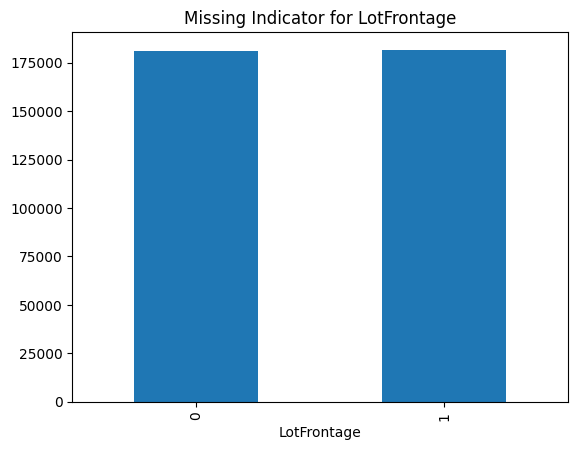

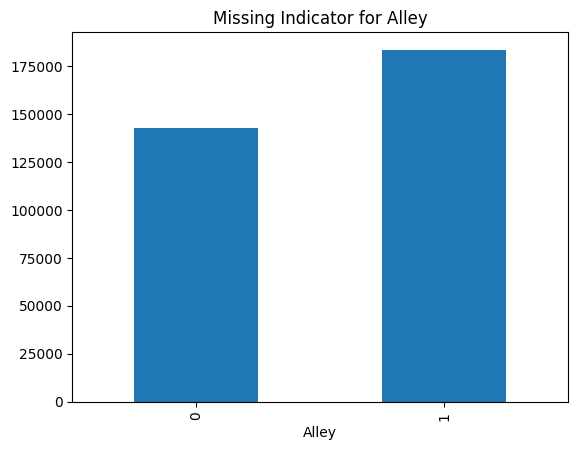

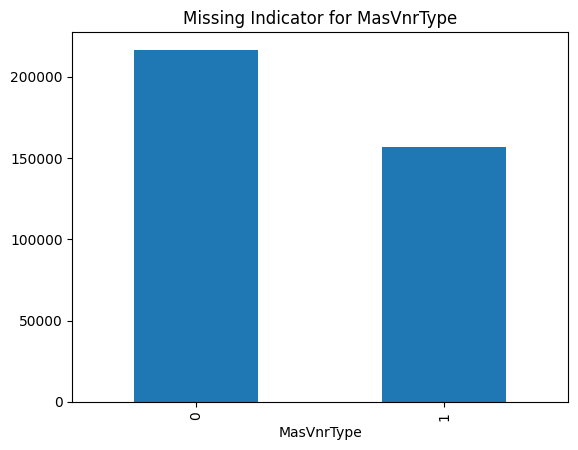

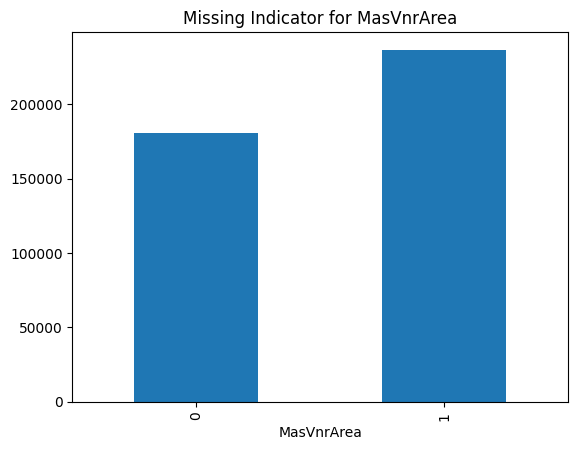

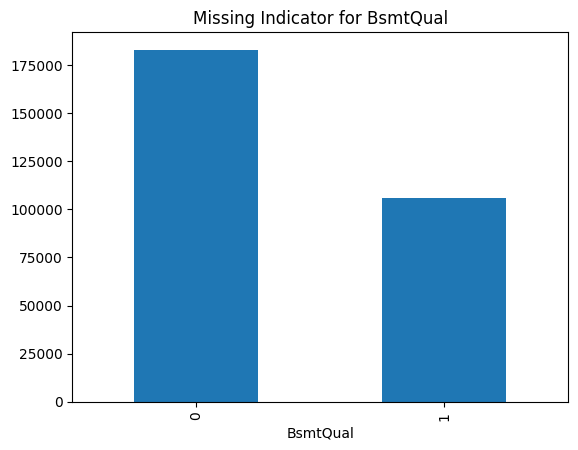

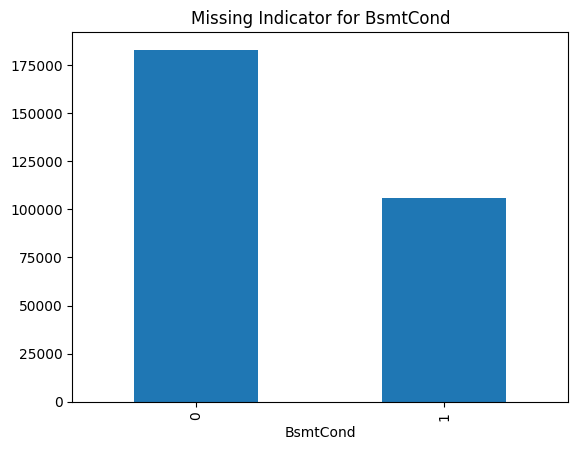

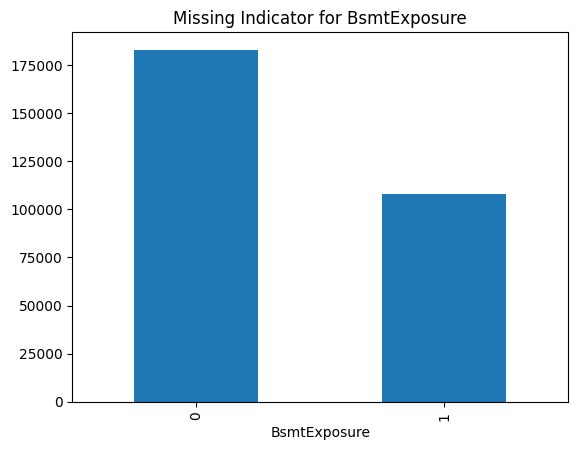

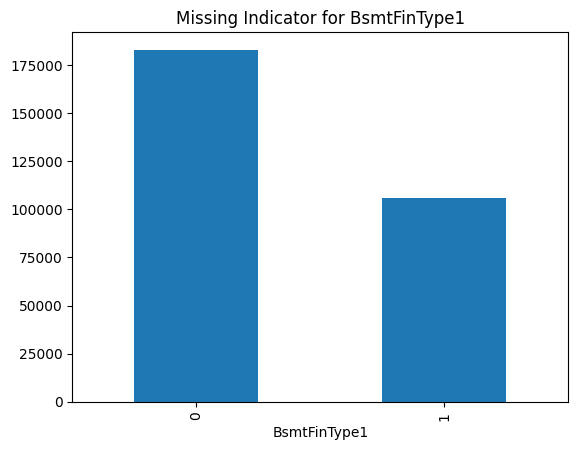

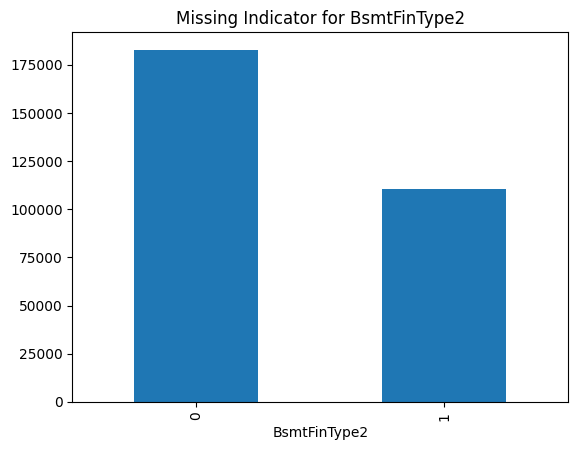

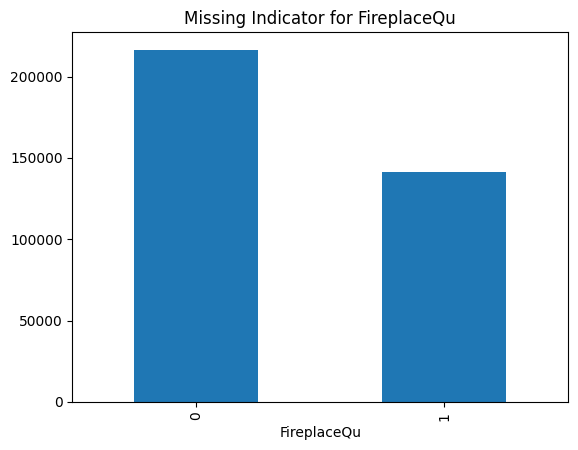

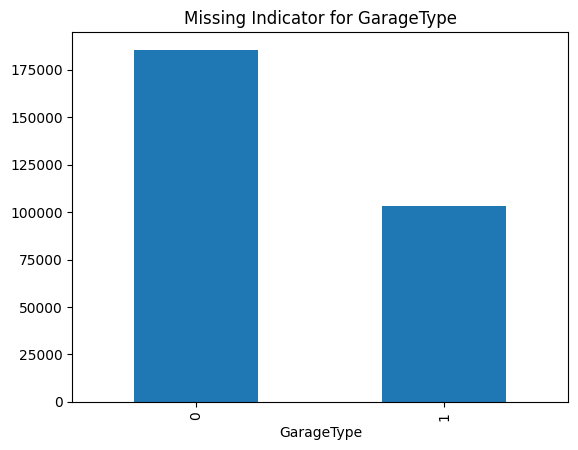

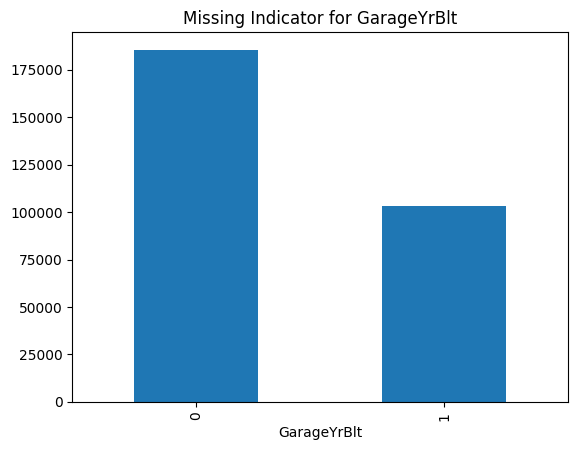

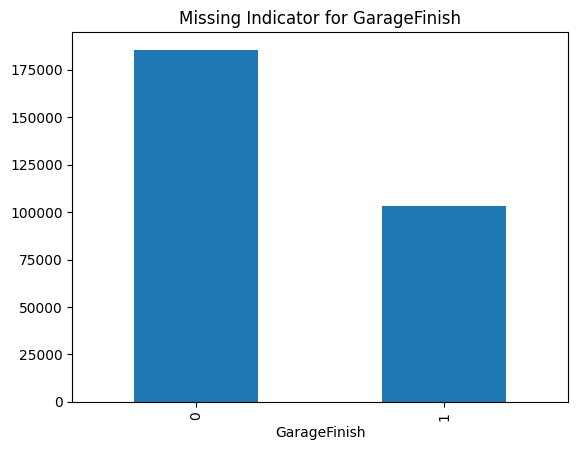

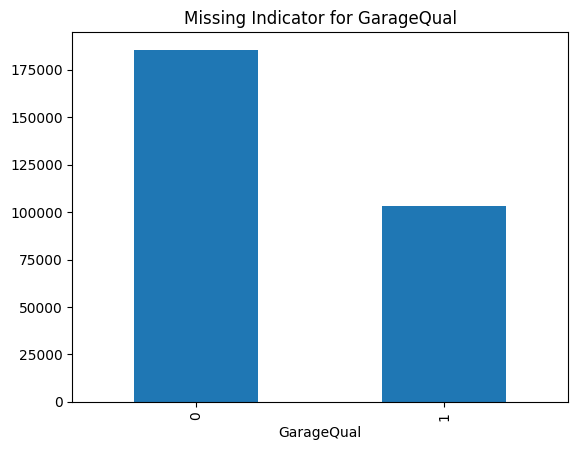

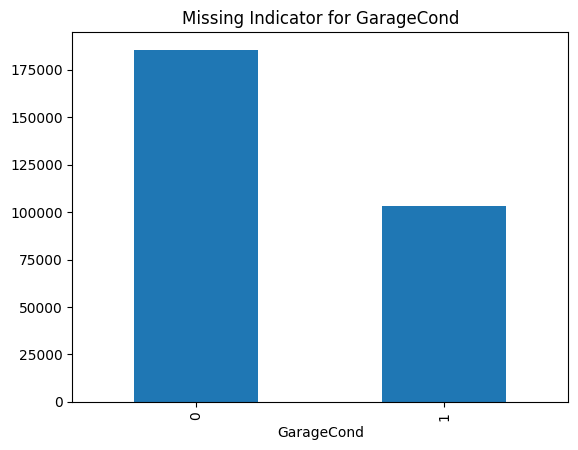

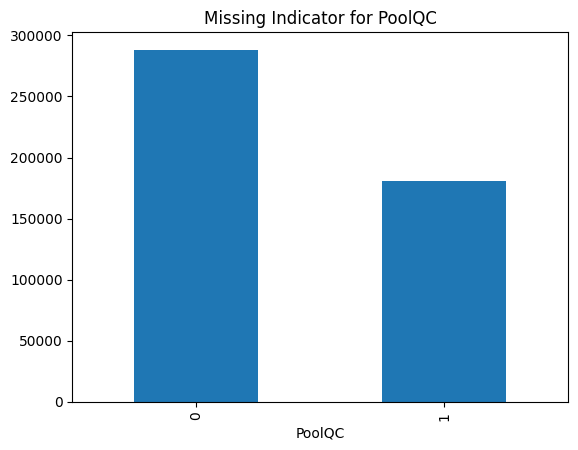

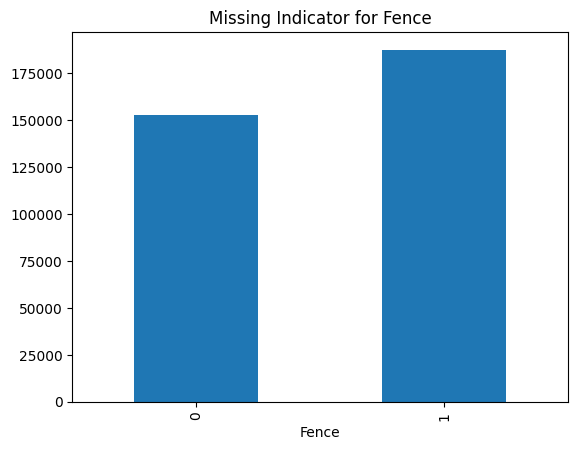

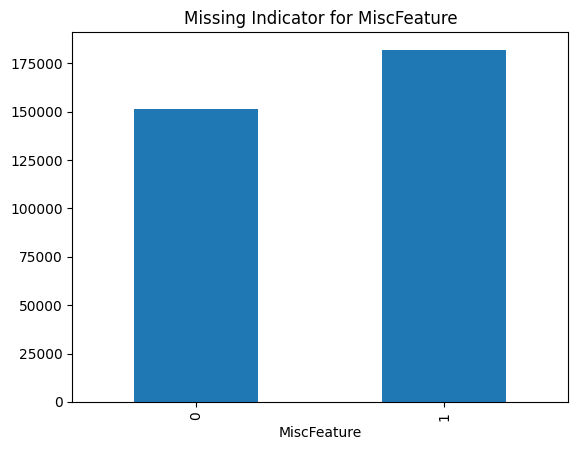

In [8]:
for f in features_with_na:
    data = dataset.copy()
    data[f] = np.where(data[f].isnull(), 1, 0)
    data.groupby(f)['SalePrice'].mean().plot(kind='bar')
    plt.title(f'Missing Indicator for {f}')
    plt.show()


we can see that whichever has more no of nan s the price seems to be a bit lower 

we dont need the column id so lets remove it

This code prints the number of entries (rows) in the `Id` column of the `dataset` DataFrame. The `len(dataset.Id)` function returns the total count of IDs, and the `format` method inserts this value into the string for display. This helps verify the number of records in the dataset.

In [9]:
print("no of id {}".format(len(dataset.Id)))

no of id 1460


In [10]:
numerical_features=[f for f in dataset if dataset[f].dtypes !='O'] #collecting all numerical features
print(len(numerical_features))
dataset[numerical_features].head()

38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


finding the features that are related to time

In [11]:
temporal_features=[f for f in dataset if 'Yr' in f or 'Year' in f]
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

finding out how price changes with time

<Axes: xlabel='YrSold'>

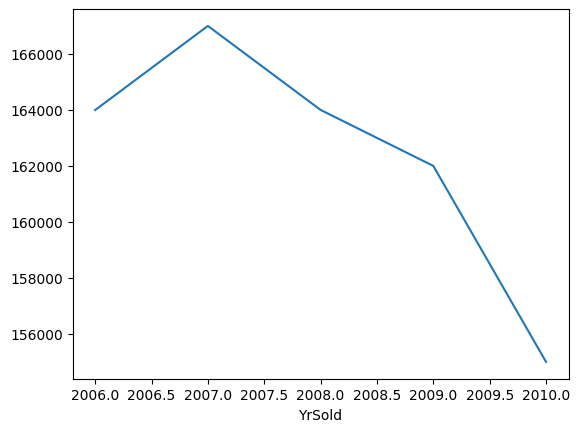

In [12]:
dataset.groupby('YrSold')['SalePrice'].median().plot()

comparing how price differs on diff time features

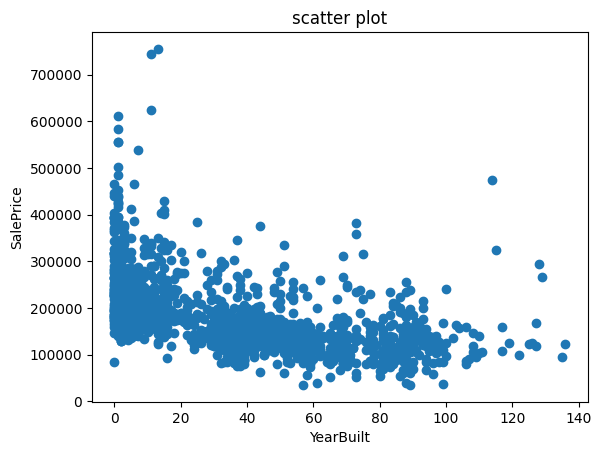

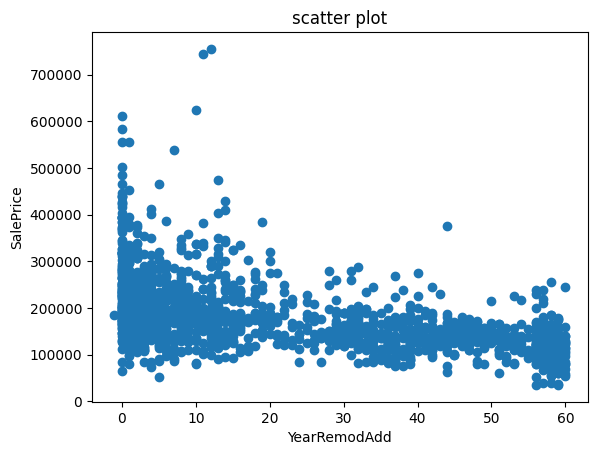

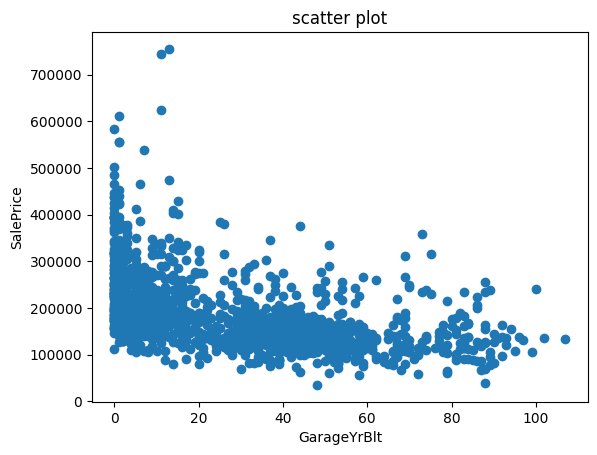

In [13]:
for f in temporal_features:
    if f !='YrSold':
        data=dataset.copy()

        data[f]=data['YrSold']-data[f]

        plt.scatter(data[f],data['SalePrice'])
        plt.title('scatter plot')
        plt.xlabel(f)
        plt.ylabel('SalePrice')
        plt.show()

In [18]:
discrete_features=[f for f in numerical_features if len(dataset[f].unique())<25 and f not in temporal_features+['Id']]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']